
# Descriptive Analysis of MBA Students data
***
## Analysis of a Single Variable


### Data Import

In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
mba_df = pd.read_csv("MBA_Students_Data.csv")

In [3]:
mba_df.shape

(200, 15)

In [4]:
mba_df.head()

,sr_no,mba_specialization,mba_grades,gender,age,pg_degree,grad_degree,grad_pass_year,grad_pct,ten_plus_2_pass_year,ten_plus_2_pct,ten_plus_2_stream,tenth_pass_year,tenth_std_pct,work_exp_in_mths
0,1,Business Analytics,8.2,M,26,No,B.Tech,2011,61.65,2008,85.67,Science,2006,80.00,44.0
1,2,Marketing,8.5,F,21,No,B.M.S,2016,76.75,2013,87.54,Commerce,2011,88.40,NaN
2,3,Marketing,8.9,M,21,No,B.Sc,2015,77.25,2012,75.07,Science,2010,84.20,0.0
3,4,Marketing,8.2,F,23,No,B.Com,2014,84.21,2011,82.77,Commerce,2009,85.09,NaN
4,5,Marketing,7.2,F,21,No,B.M.S,2015,71.00,2012,71.45,Commerce,2010,78.36,6.0


## Analysis of a Single Categorical Variable
### Frequency Distribution
***
### Analysis of MBA Specialization Field

In [5]:
mba_df["mba_specialization"].value_counts()

Finance               80
Marketing             70
HR                    25
Business Analytics    25
Name: mba_specialization, dtype: int64

In [6]:
freq_table = mba_df["mba_specialization"].value_counts().to_frame()
freq_table.reset_index(inplace=True) # reset index
freq_table.columns = [   "Specialization"   , 'Cnt_Students'] # rename columns
freq_table["Pct_Students"] = freq_table['Cnt_Students'] / sum(freq_table['Cnt_Students'])
freq_table

,Specialization,Cnt_Students,Pct_Students
0,Finance,80,0.400
1,Marketing,70,0.350
2,HR,25,0.125
3,Business Analytics,25,0.125


### Bar Plot

<BarContainer object of 4 artists>

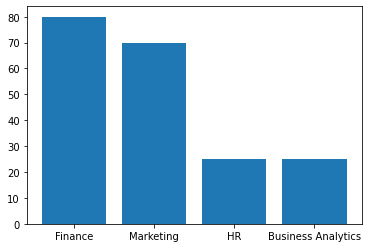

In [7]:
# Simple one line syntax to make bar plot
plt.bar(freq_table['Specialization'], freq_table['Cnt_Students']) 

Text(0.5, 1.0, 'Specialization Bar Plot')

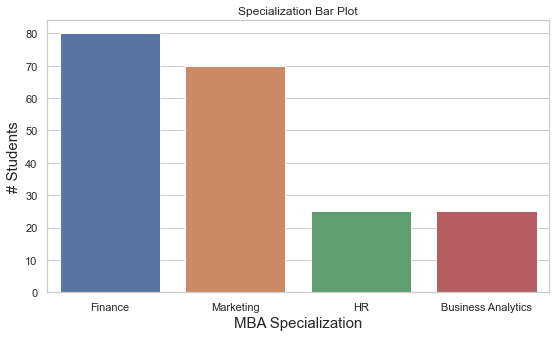

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,5))
ax = sns.barplot( x = freq_table['Specialization'], 
            y = freq_table['Cnt_Students'])
ax.set_xlabel("MBA Specialization",fontsize=15)
ax.set_ylabel("# Students",fontsize=15)
ax.set_title("Specialization Bar Plot")


### Pie Plot

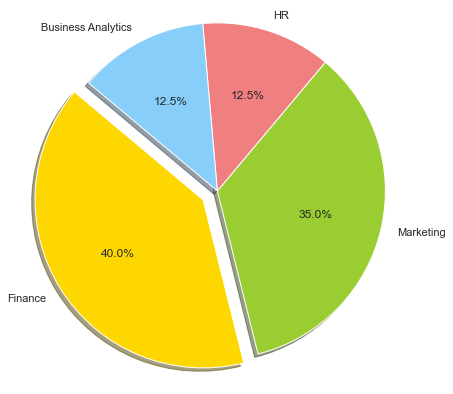

In [10]:
plt.figure(figsize=(7,7))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(freq_table['Cnt_Students'],
        labels=freq_table['Specialization'],
        explode=explode,  
        colors=colors,
        autopct='%1.1f%%', 
        shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Analysis of Single Categorical Variable | Graduation Degree

In [11]:
freq_grad_deg = mba_df['grad_degree'].value_counts()
freq_grad_deg.count()

45

In [12]:
freq_grad_deg

B.Com                                           65
B.M.S                                           31
B.E                                             18
B.E - Mechanical                                 9
B.A.F                                            9
B.Com - Honours                                  6
B.Tech                                           4
B.B.A                                            4
B.E - Computers                                  3
B.Sc                                             3
B.E - Civil                                      3
B.E - EXTC                                       3
B.Tech - Computer Science                        2
B.Com - Financial Markets                        2
B.Tech - Mechanical                              2
Bachelor of Banking and Insurance                2
B.Sc - Information Technology                    2
B.E - Computer Engineering                       2
B.E - Production Engineering                     2
B.E - Electrical               

In [13]:
def fn_grad_deg_recat(x):
    x = x.upper()
    if ("B.COM" in x
        or "B.A.F" in x
       ):
        return "B.Com / B.A.F"
    elif ("B.E" in x 
          or "B.TECH" in x
          or x == "BACHELOR IN ENGINEERING"
          or x == "BACHELOR IN COMPUTER APPLICATION"
         ):
        return "B.E / B.Tech"
    elif "B.M.S" in x:
        return "B.M.S"
    elif "B.SC" in x:
        return "B.Sc"
    elif ("B.BA" in x
           or "B.B.A" in x
         ):
        return "B.B.A"
    else:
        return "Other Specializations"

In [14]:
mba_df['grad_deg_recat'] = mba_df['grad_degree'].map(fn_grad_deg_recat)
freq_grad_deg = mba_df['grad_deg_recat'].value_counts().to_frame()
freq_grad_deg.reset_index(inplace=True) # reset index
freq_grad_deg.columns = [   "Graduation Degree"   , 'Cnt_Students'] # rename columns
freq_grad_deg["Pct_Students"] = freq_grad_deg['Cnt_Students'] / sum(freq_grad_deg['Cnt_Students'])
freq_grad_deg

,Graduation Degree,Cnt_Students,Pct_Students
0,B.Com / B.A.F,82,0.410
1,B.E / B.Tech,63,0.315
2,B.M.S,31,0.155
3,B.Sc,12,0.060
4,B.B.A,6,0.030
5,Other Specializations,6,0.030


# Analysis of a Single Continuous Variable
***
## Histograms & Density Plots

In [15]:
grades_mean = round(mba_df["mba_grades"].mean(),1)
grades_median = round(mba_df["mba_grades"].median(),1)
grades_min = round(mba_df["mba_grades"].min(),1)
grades_max = round(mba_df["mba_grades"].max(),1)
grades_std = round(np.std(mba_df["mba_grades"]),1)

In [16]:
print("Mean grade of the students is :" , grades_mean)
print("Median grade of the students is :" , grades_median)
print("Min grade of the students is :" , grades_min)
print("Max grade of the students is :" , grades_max)
print("Std. Dev of the students grade is :" , grades_std)

Mean grade of the students is : 7.4
Median grade of the students is : 7.5
Min grade of the students is : 6.3
Max grade of the students is : 9.2
Std. Dev of the students grade is : 0.6


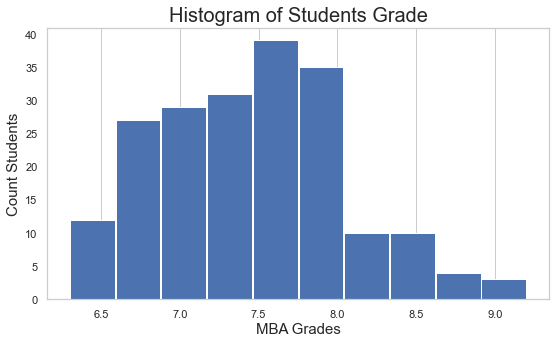

In [19]:
plt.figure(figsize=(9,5))
plt.hist(mba_df['mba_grades'], rwidth = 0.98)

plt.title("Histogram of Students Grade", fontsize=20)
plt.xlabel('MBA Grades', fontsize=15)
plt.ylabel('Count Students', fontsize=15)
plt.grid(axis='y')

2023-09-05 10:26:51,818 [4456] WARNING  py.warnings:110: [JupyterRequire] D:\ProgramData\Anaconda3\envs\PyEnv37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



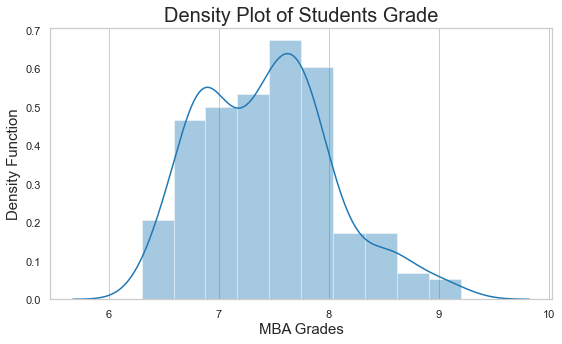

In [22]:
plt.figure(figsize=(9,5))
sns.distplot(mba_df['mba_grades'],            
             hist = True, bins=10, 
             kde=True, color='#1F78B4'
            )
## KDE stands for Kernel Density Estimate

plt.title("Density Plot of Students Grade", fontsize=20)
plt.xlabel('MBA Grades', fontsize=15)
plt.ylabel('Density Function', fontsize=15)
plt.grid(axis='y')

Text(0.5, 0, 'MBA Grades')

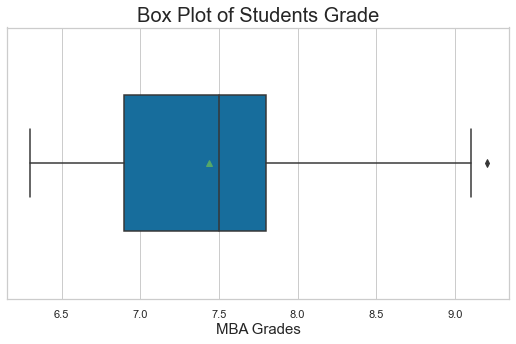

In [23]:
plt.figure(figsize=(9,5))
boxplot = sns.boxplot(x='mba_grades',
                 data=mba_df, showmeans=True,
                 width=0.5, 
                 palette="colorblind")
plt.title("Box Plot of Students Grade", fontsize=20)
plt.xlabel('MBA Grades', fontsize=15)

## Percentile Distribution

In [24]:
# Get the percentile distribution of the students grade
mba_df['mba_grades'].quantile([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).to_frame().T

,0.00,0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99,1.00
mba_grades,6.3,6.5,6.5,6.79,6.9,7.5,7.8,8.2,8.6,9.001,9.2


# Thank you 


In [26]:
# conda install -c conda-forge pandas-profiling
import pandas_profiling as pp
report = pp.ProfileReport(mba_df, minimal=True)
report.to_file("mba_students_Report.html")